# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import jenkspy
from scipy.stats import zscore

# Question 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/HW1/student.csv', delimiter=';')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


## Part a

In [ ]:
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.shape

(649, 33)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### More Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

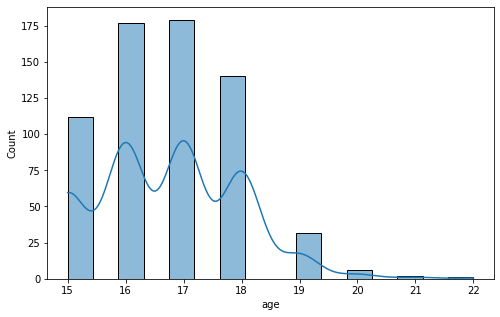

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['age'], kde=True, ax=ax)

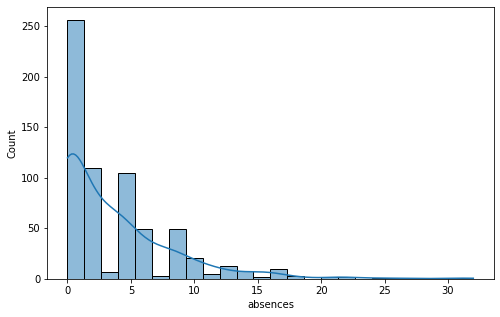

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['absences'], kde=True, ax=ax)

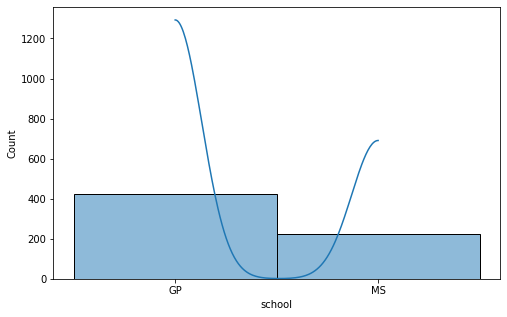

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['school'], kde=True, ax=ax)

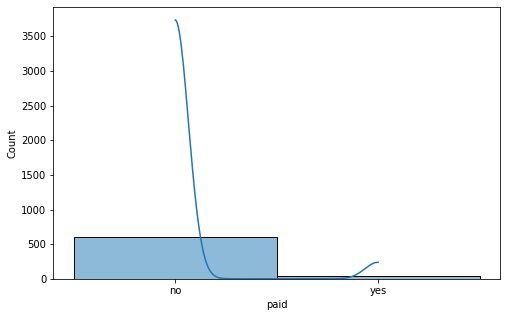

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['paid'], kde=True, ax=ax)

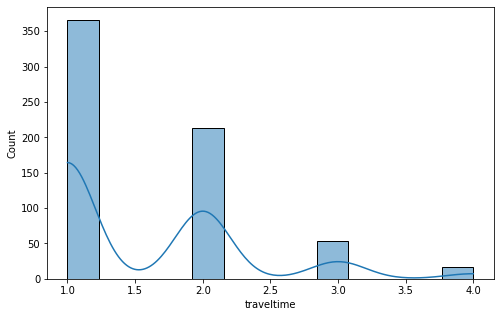

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['traveltime'], kde=True, ax=ax)

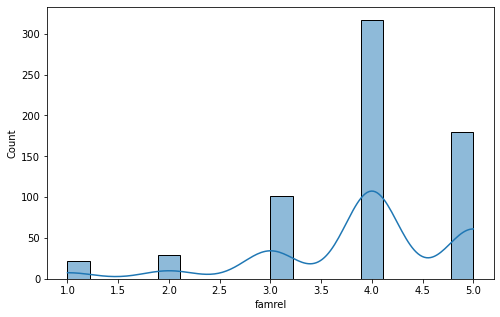

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['famrel'], kde=True, ax=ax)

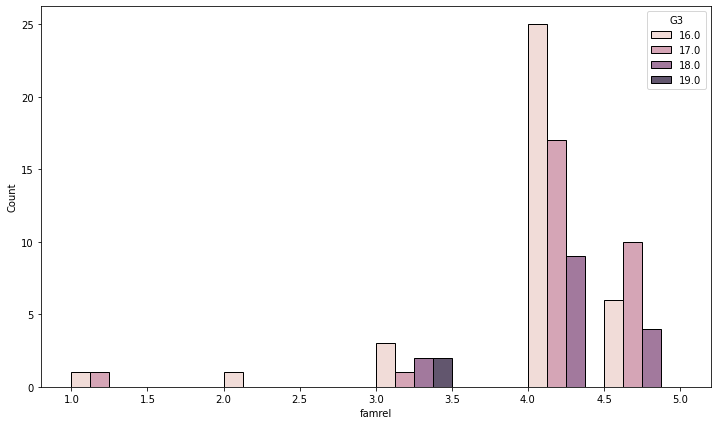

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(df, x=df['famrel'], multiple="dodge", hue=df['G3'][df['G3']>15], ax=ax)

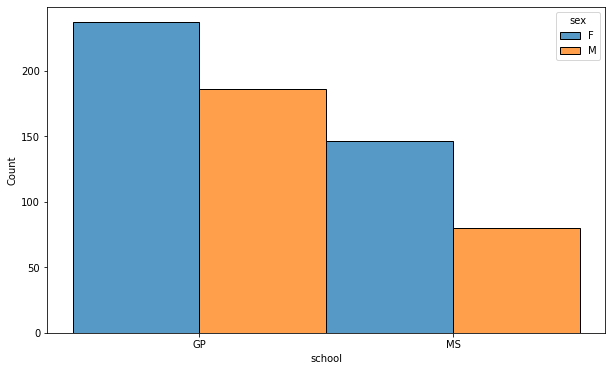

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['sex'], ax=ax)

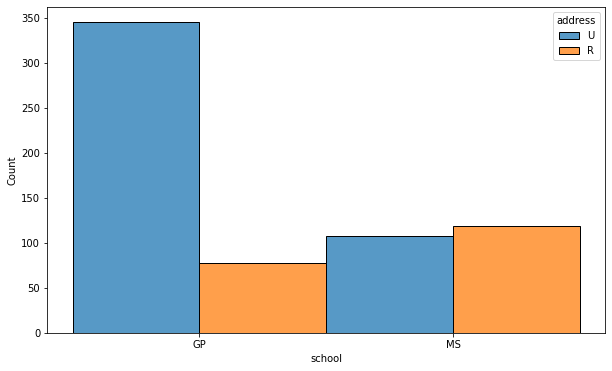

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['address'], ax=ax)

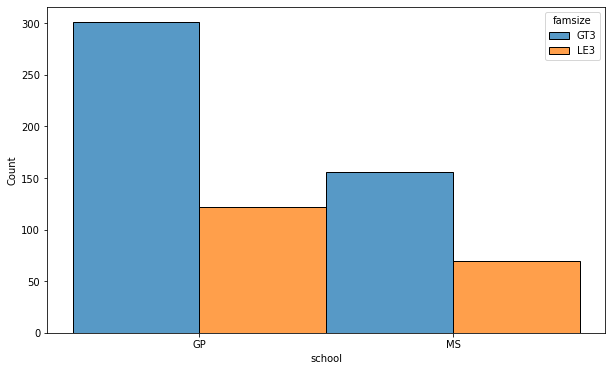

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['famsize'], ax=ax)

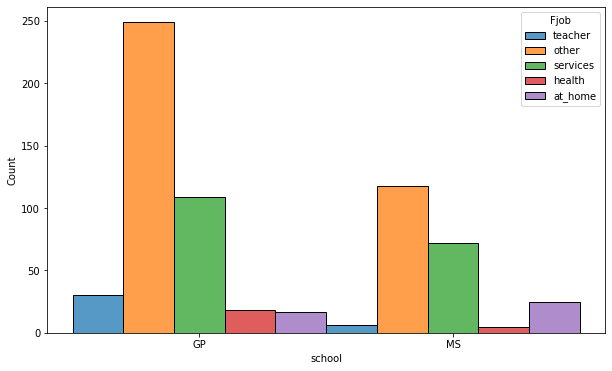

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['Fjob'], ax=ax)

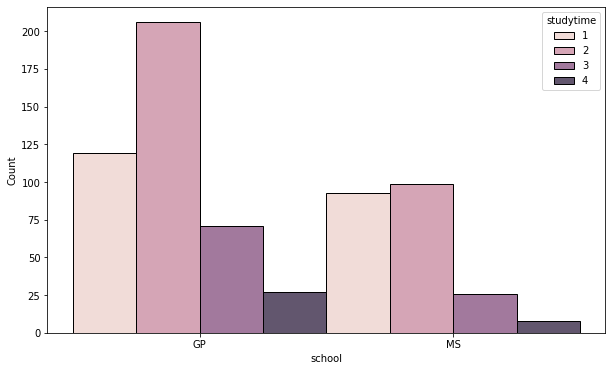

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['studytime'], ax=ax)

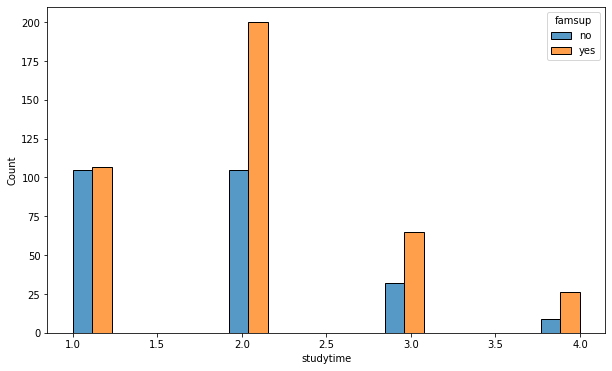

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['studytime'], multiple="dodge", hue=df['famsup'], ax=ax)

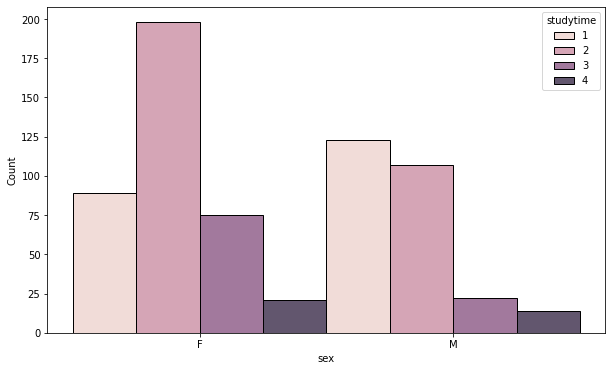

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['sex'], multiple="dodge", hue=df['studytime'], ax=ax)

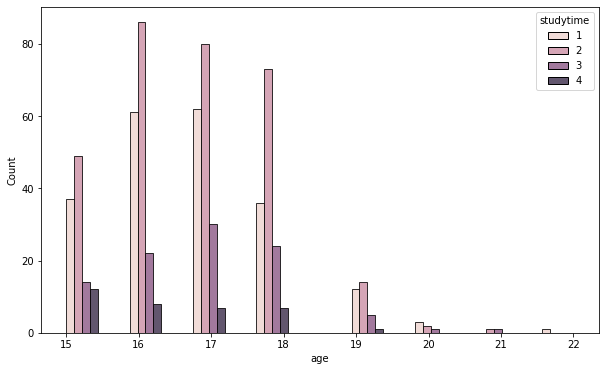

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['age'], multiple="dodge", hue=df['studytime'], ax=ax)

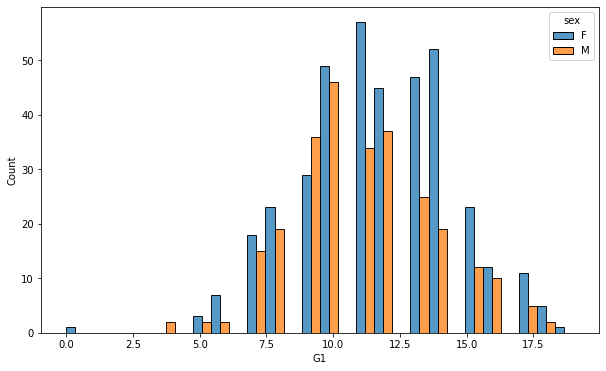

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['G1'], multiple="dodge", hue=df['sex'], ax=ax)

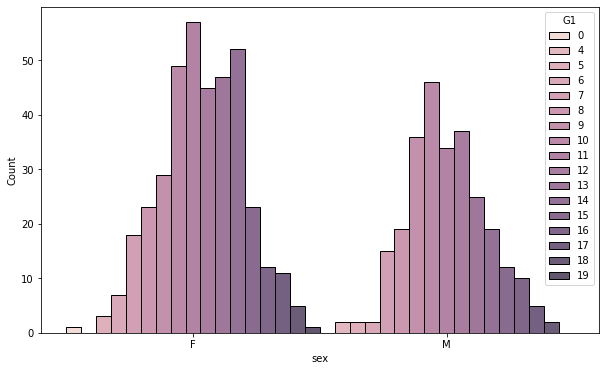

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['sex'], multiple="dodge", hue=df['G1'], ax=ax)

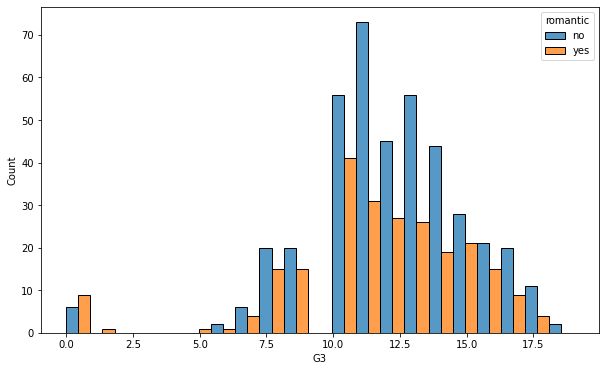

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['G3'], multiple="dodge", hue=df['romantic'], ax=ax)

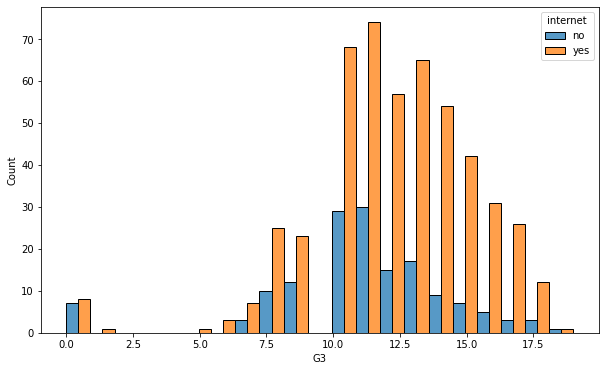

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['G3'], multiple="dodge", hue=df['internet'], ax=ax)

## Part b

In [ ]:
df[df.columns[30:33]]

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


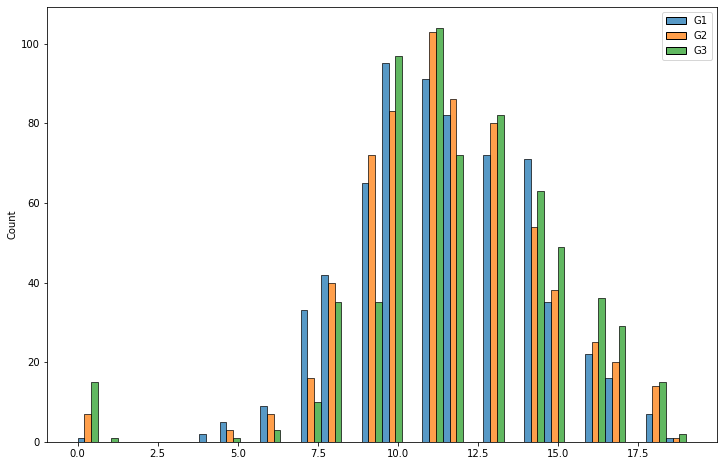

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(df[df.columns[30:33]], ax=ax, multiple="dodge")

## Part c

In [ ]:
df['Grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.333333


## Part d

In [ ]:
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [ ]:
pd.unique(df['sex'])

array(['F', 'M'], dtype=object)

In [ ]:
df['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [ ]:
df['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [ ]:
df['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

In [ ]:
sex_values = dict(df['sex'].value_counts())
internet_values = dict(df['internet'].value_counts())
address_values = dict(df['address'].value_counts())
pstatus_values = dict(df['Pstatus'].value_counts())
reason_values = dict(df['reason'].value_counts())
schoolsup_values = dict(df['schoolsup'].value_counts())

([<matplotlib.patches.Wedge at 0x7eff97083d10>,
 [Text(-0.35557855356893153, -1.0409437507578527, 'no'),
  Text(0.3555785048388379, 1.040943767403685, 'yes')],
 [Text(-0.19395193831032626, -0.5677875004133742, '89.52%'),
  Text(0.1939519117302752, 0.567787509492919, '10.48%')])

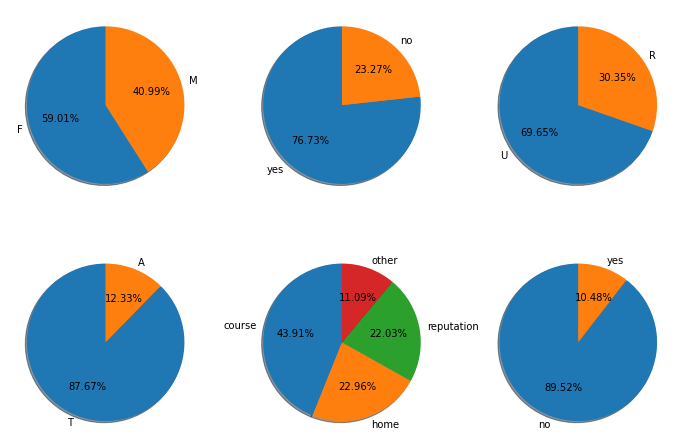

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].pie(sex_values.values(), labels=sex_values.keys(), shadow=True, startangle=90, autopct='%1.2f%%')
axs[0, 1].pie(internet_values.values(), labels=internet_values.keys(),shadow=True, startangle=90,autopct='%1.2f%%')
axs[0, 2].pie(address_values.values(), labels=address_values.keys(),shadow=True, startangle=90, autopct='%1.2f%%')

axs[1, 0].pie(pstatus_values.values(), labels=pstatus_values.keys(), shadow=True, startangle=90, autopct='%1.2f%%')
axs[1, 1].pie(reason_values.values(), labels=reason_values.keys(),shadow=True, startangle=90, autopct='%1.2f%%')
axs[1, 2].pie(schoolsup_values.values(), labels=schoolsup_values.keys(),shadow=True, startangle=90, autopct='%1.2f%%')

## Part e

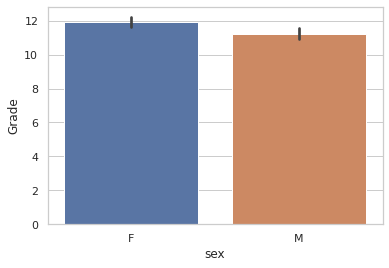

In [ ]:
# sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df, x="sex", y="Grade")

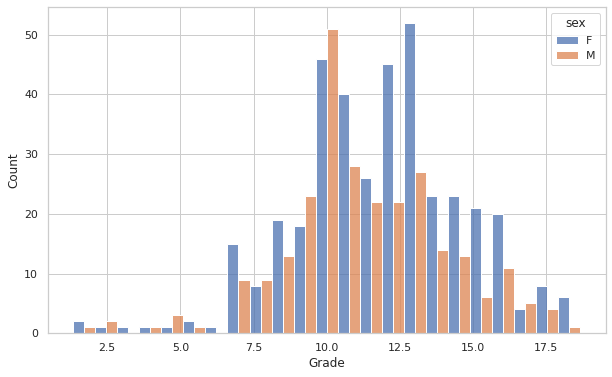

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x = df['Grade'], multiple="dodge", hue=df['sex'], ax=ax)

## Part f

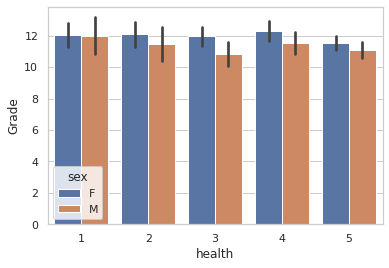

In [ ]:
ax = sns.barplot(data=df, x="health", y="Grade", hue="sex")


وضعیت سلامت ، مقادیری بین 1 (بدترین حالت) و 5 (بهترین حالت)
دارد. همانطور که در نمودار بالا مشخص است، در بین دختران، آنهایی که نمره سلامتشان 4 است بیشترین نمرات را کسب کرده اند ولی به طور شگفت انگیزی دخترانی که سلامت آنها 5 بوده است، نمرات پایین تری کسب کرده اند. همچنین در پسران ، افرادی که سلامت کمتری داشته اند، نمرات بیشتری کسب کرده اند.


## Part g

### Cut

In [ ]:
df['grade_cut'] = pd.cut(df['Grade'], bins=5, labels=['A', 'B', 'C', 'D', 'E'])

([<matplotlib.patches.Wedge at 0x7eff99913dd0>,
 [Text(-1.0809525399627056, 0.20381758105761003, 'C'),
  Text(0.7539328760065078, -0.8009901488011921, 'D'),
  Text(0.8684847527206285, 0.6750809094410749, 'E'),
  Text(0.36563957833007843, 1.0374525043386817, 'B'),
  Text(0.06386093716111103, 1.0981446993474515, 'A')],
 [Text(-0.5896104763432939, 0.11117322603142364, '44.07%'),
  Text(0.4112361141853679, -0.43690371752792295, '35.90%'),
  Text(0.4737189560294337, 0.36822595060422264, '11.09%'),
  Text(0.19943976999822458, 0.5658831841847355, '7.09%'),
  Text(0.034833238451515106, 0.5989880178258826, '1.85%')])

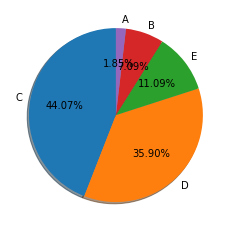

In [ ]:
t = dict(df['grade_cut'].value_counts())
plt.pie(t.values(), labels=t.keys(), shadow=True, startangle=90, autopct='%1.2f%%')

### Qcut

In [ ]:
df['grade_qcut'] = pd.qcut(df['Grade'], 5, labels=['A', 'B', 'C', 'D', 'E'])

([<matplotlib.patches.Wedge at 0x7eff998c61d0>,
 [Text(-0.7142916117088128, 0.8365330199355114, 'C'),
  Text(-0.9698779987588506, -0.5189765577784099, 'B'),
  Text(0.22210125062743546, -1.0773444363200328, 'A'),
  Text(1.0888035780743386, -0.15654637770487642, 'E'),
  Text(0.585718282478176, 0.9310929564607476, 'D')],
 [Text(-0.3896136063866251, 0.45629073814664256, '22.50%'),
  Text(-0.5290243629593729, -0.2830781224245872, '20.65%'),
  Text(0.12114613670587387, -0.5876424198109269, '20.18%'),
  Text(0.593892860767821, -0.08538893329356895, '18.80%'),
  Text(0.3194826995335505, 0.507868885342226, '17.87%')])

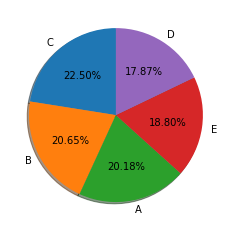

In [ ]:
q = dict(df['grade_qcut'].value_counts())
plt.pie(q.values(), labels=q.keys(), shadow=True, startangle=90, autopct='%1.2f%%')

## Part h

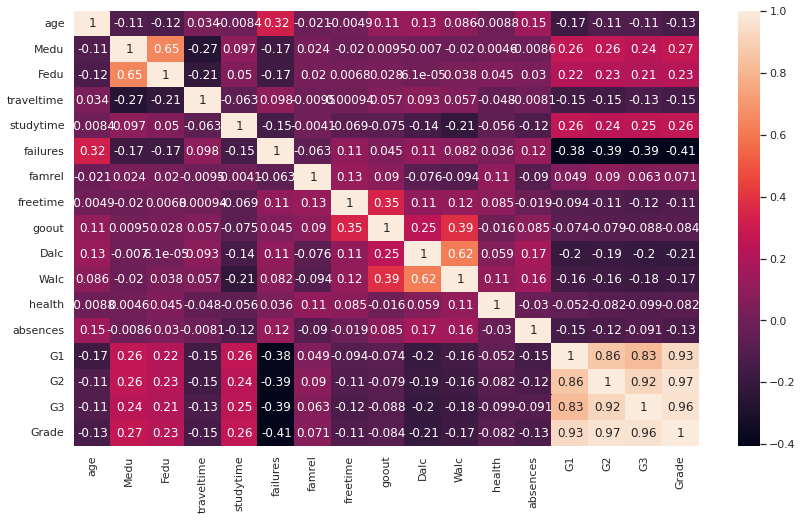

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, annot = True, ax=ax)

دو ویژگی Dalc و Walc نزدیک به هم هستند